# Press-Schectar formalism

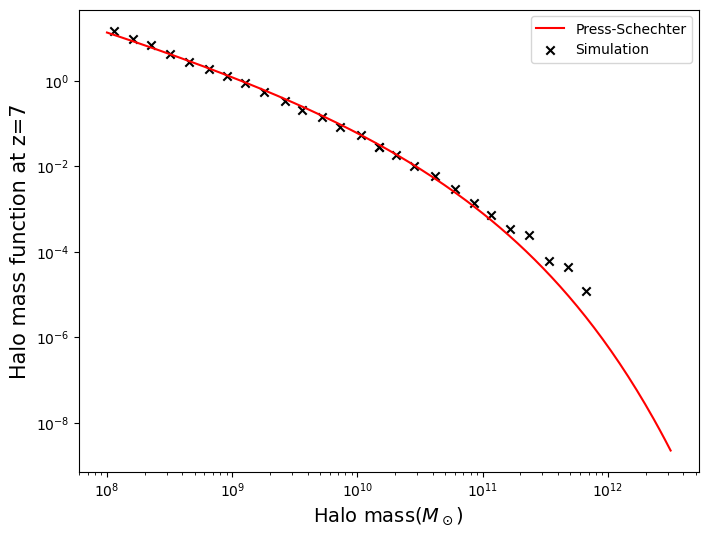

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#cosmological parameters
omega_m=0.3 #matter density parameter
rho_crit=2.77e11 #critical density
h=0.7
delta_c=1.686 #critical overdensity
rho_m=rho_crit*omega_m*h**2#mean matter density

#growth factor D(z)
def growth_factor(z):
    return 1.686/(1+z) 

#sigma(M,z) using power law approximation
sigma_8=0.85 #known value

R_8=8 #radius of the sphere in h^-1Mpc

M_8=(4/3)*np.pi*(R_8**3)*rho_m

def sigma(M,z):
    sigma=sigma_8*(M/M_8)**(-0.17)
    return sigma*growth_factor(z)

#Press-Schechter mass function
def n(M,z):
    return np.sqrt(2/np.pi)*(delta_c/sigma(M,z))*np.exp(-(delta_c/sigma(M,z))**2/2)*(rho_m/M)*np.abs(-0.17)
M=np.logspace(8,12.5,200)
z=7

#Simulation values
Sim_M  = np.array([114590792.4,161073475.5,226411424.1,318253100.4,455030665.2,650591953.5,914498493.7,1263757034,1806889558,2627806277,3631398728,5192086980,7298208496,10613973615,14919432727,14919432727,20269320353,28491380553,41435752570,60261088011,84705434673,1.17056E+11,1.64538E+11,2.35252E+11,3.36358E+11,4.80917E+11,6.64585E+11])
Sim_vals = np.array([14.82868575,9.405546404,6.862808826,4.203142793,2.760988761,1.878296973,1.277802926,0.869287627,0.532397174,0.337689153,0.206818486,0.14069834,0.083205511,0.052775634,0.028097598,0.028097598,0.017821759,0.010176644,0.006018215,0.002884537,0.001382561,0.000736072,0.000340659,0.000248563,6.12452E-05,4.315E-05,1.18098E-05])

#plotting
plt.figure(figsize=(8,6))
plt.loglog(M,0.4*n(M,z),'r-',label='Press-Schechter')
plt.scatter(Sim_M,Sim_vals,marker='x',c='k',label='Simulation')
plt.xlabel(r"Halo mass($M_\odot$)",fontsize=14)
plt.ylabel("Halo mass function at z=7",fontsize=15)
plt.legend()
plt.show()